In [83]:
import os
import copy
import torch
import json
import time
import math
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import numpy as np
import random
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm
#from mlxtend.plotting import plot_decision_regions
from gpolnel.utils.tree import Tree
from gpolnel.problems.inductive_programming import SML
#from gpolnel.utils.utils import train_test_split
from gpolnel.utils.ffunctions import Ffunctions
from gpolnel.utils.tree import Tree
from gpolnel.utils.inductive_programming import function_map, _get_tree_depth
from gpolnel.algorithms.genetic_algorithm import GeneticAlgorithm, GSGP
from gpolnel.operators.initializers import grow
from gpolnel.problems.problem import Problem
from gpolnel.operators.selectors import prm_tournament
from gpolnel.operators.variators import prm_efficient_gs_mtn
import codecs
import neat

#from gpolnel.operators.variators import prm_efficient_gs_mtn
#from gpolnel.operators.selectors import prm_tournament

In [84]:
#pip install tensorflow

In [85]:
# !pip uninstall scikit-learn
# !pip install scikit-learn -y

In [86]:
data = pd.read_csv("data_project_nel.csv")
y_fat = pd.read_csv("y_fat.csv")
y_lactose = pd.read_csv("y_lactose.csv")
y_protein = pd.read_csv("y_protein.csv")

In [87]:
data.head()
# target variables are "fat_percent", "lactose_percent", "protein_percent"

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2


In [88]:
data.shape

(324, 14)

In [89]:
y_fat.head()

,fat_percent
0,3.787156
1,3.645519
2,3.458251
3,3.407140
4,4.902554


In [90]:
y_fat.shape

(324, 1)

In [91]:
y_lactose.head()

,lactose_percent
0,4.953503
1,4.983128
2,4.889104
3,4.868969
4,4.845402


In [92]:
y_lactose.shape

(324, 1)

In [93]:
y_protein.head()

,protein_percent
0,3.511685
1,3.470806
2,3.370124
3,3.221164
4,3.395152


In [94]:
y_protein.shape

(324, 1)

In [95]:
data = pd.concat([data, y_lactose, y_fat, y_protein], axis=1)

In [96]:
data.head()

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg,lactose_percent,fat_percent,protein_percent
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0,4.953503,3.787156,3.511685
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0,4.983128,3.645519,3.470806
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8,4.889104,3.458251,3.370124
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2,4.868969,3.407140,3.221164
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2,4.845402,4.902554,3.395152


In [97]:
data.isnull().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
lactose_percent               0
fat_percent                   0
protein_percent               0
dtype: int64

In [98]:
data.drop('dry_days', axis=1, inplace=True)

In [99]:
data.describe()
# check with the dictionary to see if values make sense (especially min and max)
# "milk_kg_min_robot" -> don't really understand what this means

# but the values seem to make sense, not a lot of pre processing going on

,lactation,delivery_age_years,dim,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg,lactose_percent,fat_percent,protein_percent
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2.055556,3.040895,327.617284,4.657507,527.641508,39.585367,2.806910,2.969289,1.746837,0.202839,0.067426,0.257540,11.773148,4.892862,3.725701,3.332415
std,1.320240,1.432558,46.261491,0.585053,53.863379,6.698681,0.839749,0.552387,3.505659,1.045158,0.381647,0.248818,15.401783,0.064497,0.553990,0.149771
min,1.000000,1.666667,249.000000,2.887079,316.874074,15.355600,0.951521,2.016340,0.000000,0.000000,0.000000,0.003241,0.000000,4.707464,2.360311,2.691201
25%,1.000000,1.916667,296.000000,4.318435,490.580690,34.709342,2.147157,2.529756,0.152436,0.000000,0.000000,0.084442,0.000000,4.847754,3.358378,3.246586
50%,2.000000,2.750000,313.500000,4.672403,537.830980,39.510841,2.787723,2.940860,0.786993,0.000000,0.000000,0.187785,5.800000,4.890983,3.681142,3.347080
75%,3.000000,3.750000,346.250000,5.012795,566.156378,43.973411,3.344835,3.391920,1.582636,0.000000,0.000000,0.346494,20.200000,4.932776,4.088429,3.430267
max,8.000000,9.083333,590.000000,6.340225,638.546053,59.722312,5.526386,5.024390,36.382323,13.333333,3.826955,1.520631,82.500000,5.058967,5.183688,3.682320


C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

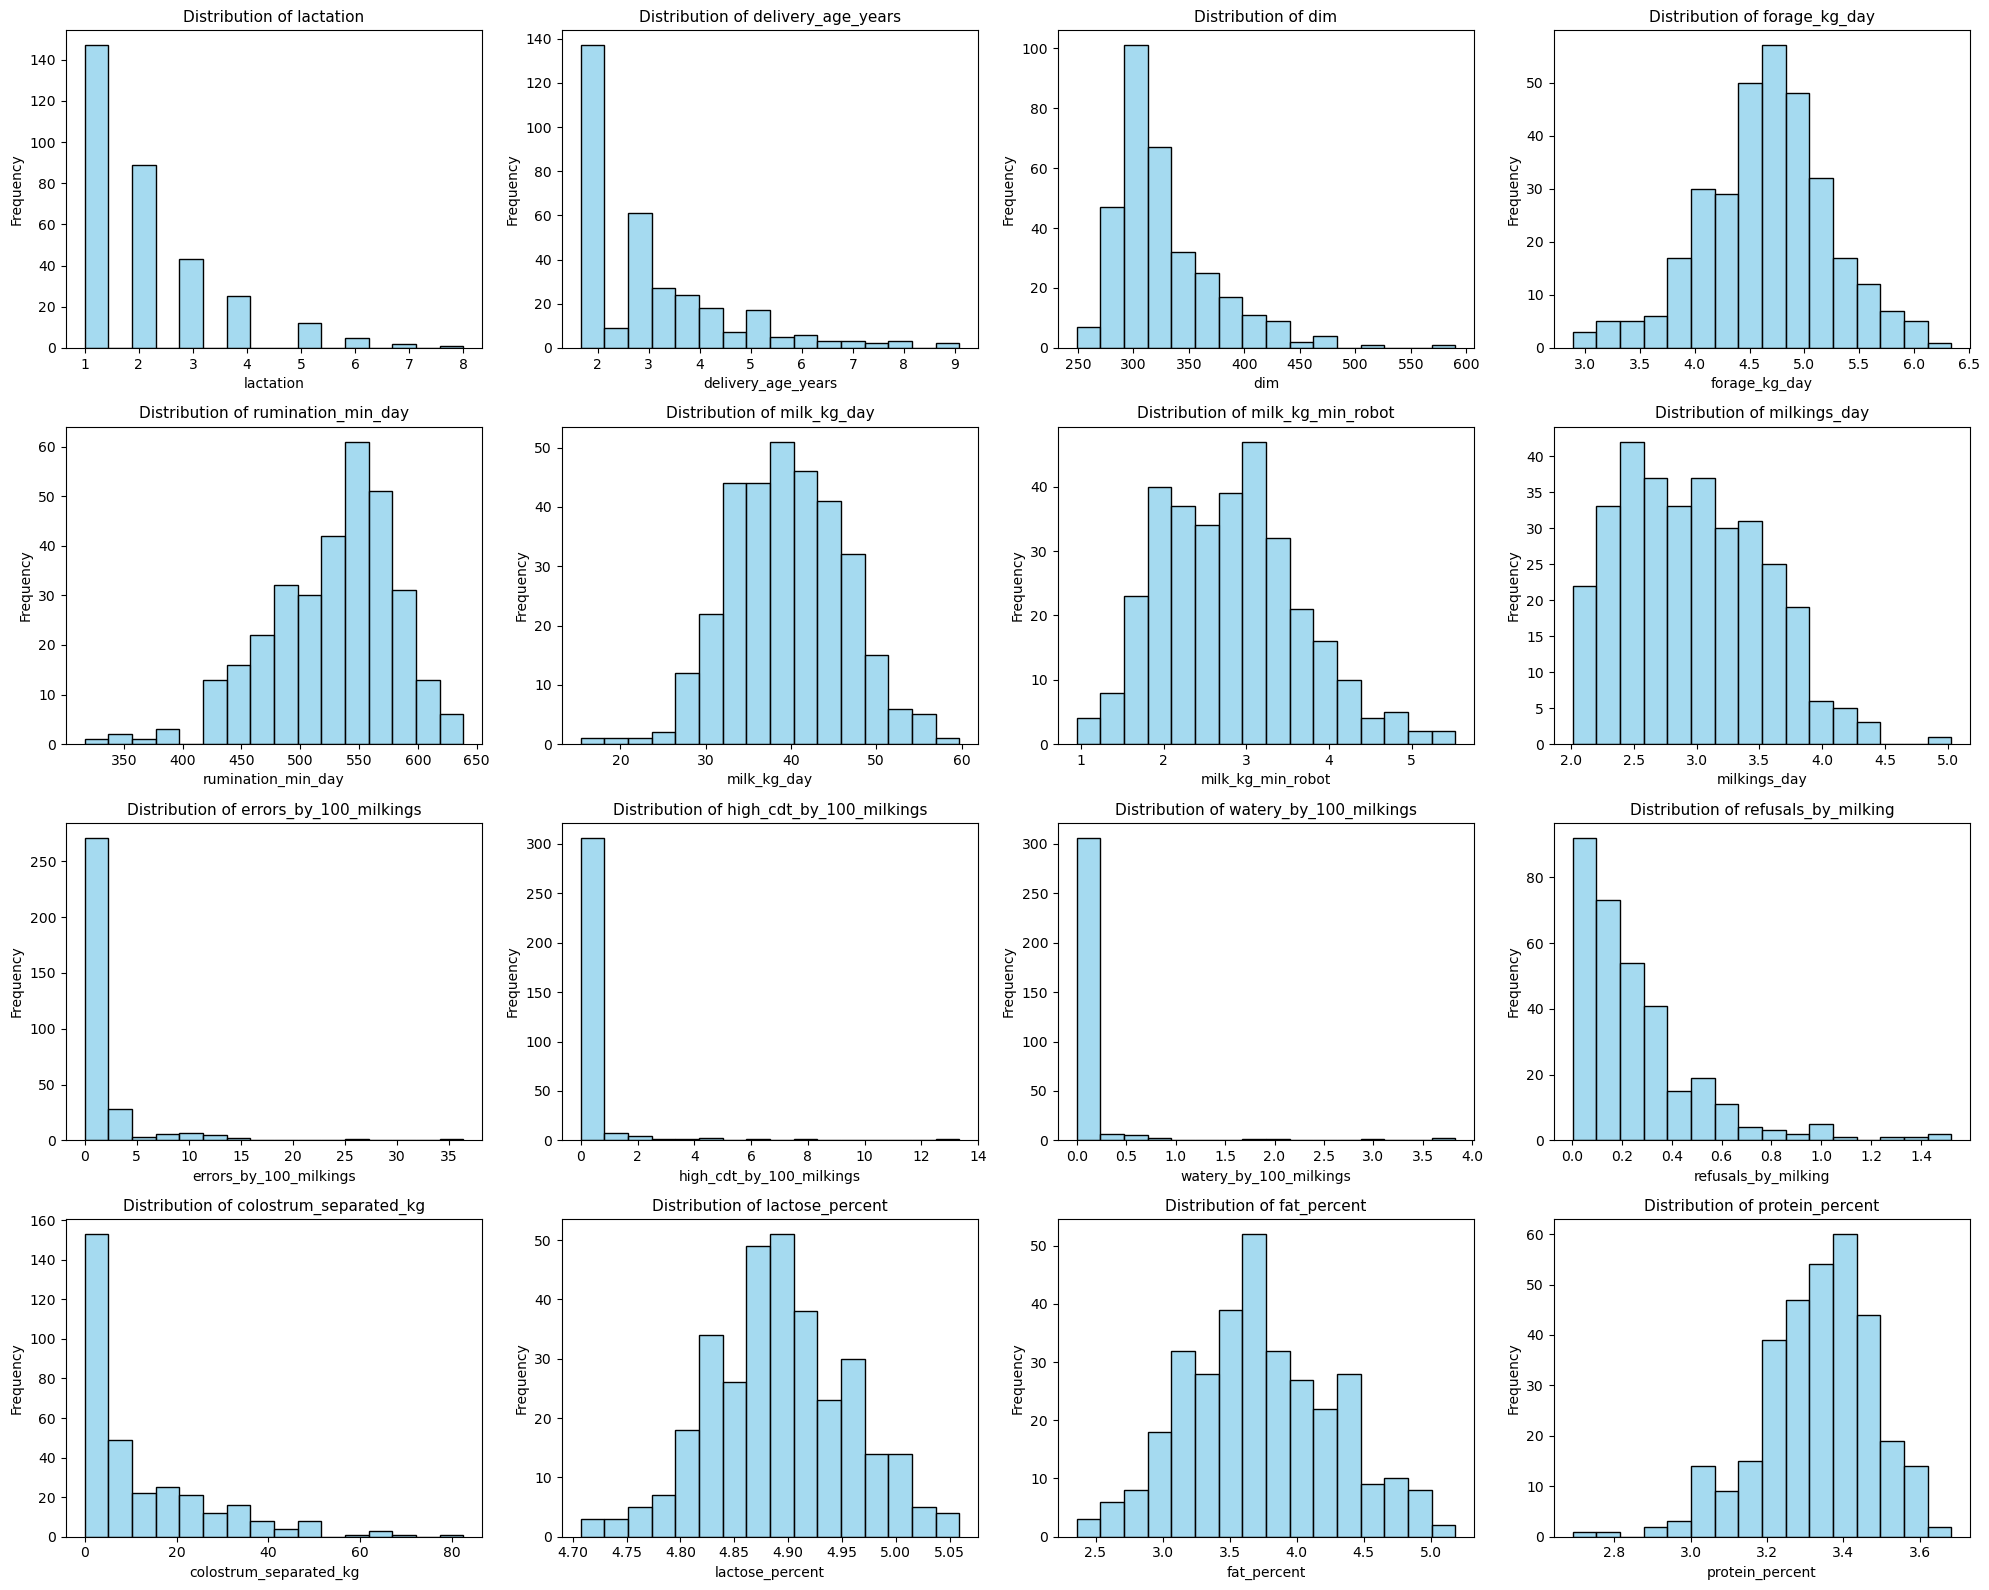

In [100]:

# Number of columns in your dataset
num_columns = len(data.columns)

# Number of rows and columns for subplots
n_rows = 4
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(data.columns):
    sns.histplot(data[column], bins=16, kde=False, color='skyblue', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=11)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [101]:
# scaler = MinMaxScaler()
# data_norm = scaler.fit_transform(data)
# data_norm = pd.DataFrame(data_norm, columns=data.columns)

In [102]:
# data_norm.head()

In [103]:
X = data.drop(columns=["fat_percent", "lactose_percent", "protein_percent"])
y_fat = data["fat_percent"]
y_lactose = data["lactose_percent"]
y_protein = data["protein_percent"]

In [104]:
X_train, X_val, y_fat_train, y_fat_val = train_test_split(X, y_fat, test_size=0.2, random_state=42)
X_train, X_val, y_lactose_train, y_lactose_val = train_test_split(X, y_lactose, test_size=0.2, random_state=42)
X_train, X_val, y_protein_train, y_protein_val = train_test_split(X, y_protein, test_size=0.2, random_state=42)

In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [106]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_fat_train = torch.tensor(y_fat_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_fat_val = torch.tensor(y_fat_val.to_numpy(), dtype=torch.float32).view(-1, 1)
y_lactose_train = torch.tensor(y_lactose_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_lactose_val = torch.tensor(y_lactose_val.to_numpy(), dtype=torch.float32).view(-1, 1)
y_protein_train = torch.tensor(y_protein_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_protein_val= torch.tensor(y_protein_val.to_numpy(), dtype=torch.float32).view(-1, 1)

In [107]:
def dataloaders(y_train, y_val):
    train_ds = TensorDataset(X_train, y_train)
    val_ds = TensorDataset(X_val, y_val)

    batch_size_GD = X_train.shape[0]
    batch_size_SGD = 1
    batch_size_MiniSGD = 32
    batch_size_ASGD = 64
    batch_size_RMSprop = 128

    train_dl_GD = DataLoader(train_ds, batch_size_GD, shuffle=True)
    val_dl_GD = DataLoader(val_ds, batch_size_GD, shuffle=True)
    train_dl_SGD = DataLoader(train_ds, batch_size_SGD, shuffle=True)
    val_dl_SGD = DataLoader(val_ds, batch_size_SGD, shuffle=True)
    train_dl_MiniSGD = DataLoader(train_ds, batch_size_MiniSGD, shuffle=True)
    val_dl_MiniSGD = DataLoader(val_ds, batch_size_MiniSGD, shuffle=True)
    train_dl_ASGD = DataLoader(train_ds, batch_size_ASGD, shuffle=True)
    val_dl_ASGD = DataLoader(val_ds, batch_size_ASGD, shuffle=True)
    train_dl_RMSprop = DataLoader(train_ds, batch_size_RMSprop, shuffle=True)
    val_dl_RMSprop = DataLoader(val_ds, batch_size_RMSprop, shuffle=True)
    

    return train_dl_GD, val_dl_GD, train_dl_SGD, val_dl_SGD, train_dl_MiniSGD, val_dl_MiniSGD, train_dl_ASGD, val_dl_ASGD, train_dl_RMSprop, val_dl_RMSprop

In [108]:
fat_data = dataloaders(y_fat_train, y_fat_val)
lactose_data = dataloaders(y_lactose_train, y_lactose_val)
protein_data = dataloaders(y_protein_train, y_protein_val)

In [109]:
def compute_rmse(predictions, targets):
    predictions = torch.tensor(predictions)
    targets = torch.tensor(targets)
    return np.sqrt(mean_squared_error(targets, predictions))

In [110]:
# Define the Net class
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.zeros_(module.bias)
    
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

    def train_model(self, num_epochs, loss_fn, optimizer, train_dl, train_size, batch_size, x_valid, y_valid):
        self.apply(self._init_weights)
        loss_hist_train = [0] * num_epochs
        rmse_hist_train = [0] * num_epochs
        loss_hist_valid = [0] * num_epochs
        rmse_hist_valid = [0] * num_epochs
        
        for epoch in tqdm(range(num_epochs)):
            epoch_train_loss = 0
            train_predictions = []
            train_targets = []
            self.train()
            for x_batch, y_batch in train_dl:
                pred = self(x_batch)
                loss = loss_fn(pred, y_batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                epoch_train_loss += loss.item()
                train_predictions.append(pred.detach().cpu().numpy())
                train_targets.append(y_batch.detach().cpu().numpy())
            
            train_predictions = np.concatenate(train_predictions)
            train_targets = np.concatenate(train_targets)
            loss_hist_train[epoch] = epoch_train_loss / (train_size / batch_size)
            rmse_hist_train[epoch] = compute_rmse(train_predictions, train_targets)
            
            self.eval()
            with torch.no_grad():
                pred = self(x_valid)
                valid_loss = loss_fn(pred, y_valid).item()
                loss_hist_valid[epoch] = valid_loss
                rmse_hist_valid[epoch] = compute_rmse(y_valid.cpu().numpy(), pred.cpu().numpy())
        return loss_hist_train, loss_hist_valid, rmse_hist_train, rmse_hist_valid

# Instantiate the neural networks for each target variable
input_dim = X_train.shape[1]
nn_names = ['GD', 'SGD', 'MiniSGD', 'ASGD', 'RMSprop']
nn_torch = {k: Net(input_dim) for k in nn_names}

# Define loss function and optimizer
loss_fn = nn.MSELoss()
learning_rate =.05
optimizer = {
    'GD': torch.optim.SGD(nn_torch['GD'].parameters(), lr=learning_rate),
    'SGD': torch.optim.SGD(nn_torch['SGD'].parameters(), lr=learning_rate),
    'MiniSGD': torch.optim.SGD(nn_torch['MiniSGD'].parameters(), lr=learning_rate),
    'ASGD': torch.optim.ASGD(nn_torch['ASGD'].parameters(), lr=learning_rate),
    'RMSprop': torch.optim.RMSprop(nn_torch['RMSprop'].parameters(), lr=learning_rate)
}



In [111]:
num_epochs = 20

# Function to train and evaluate models for a given target variable
def train_and_evaluate(nn_torch, optimizer, dataloaders, y_valid):
    train_dl_GD, val_dl_GD, train_dl_SGD, val_dl_SGD, train_dl_MiniSGD, val_dl_MiniSGD, train_dl_ASGD, val_dl_ASGD, train_dl_RMSprop, val_dl_RMSprop = dataloaders
    history = {}

    history['GD'] = nn_torch['GD'].train_model(
        loss_fn=loss_fn, 
        optimizer=optimizer['GD'], 
        num_epochs=num_epochs, 
        train_dl=train_dl_GD, 
        train_size=X_train.shape[0], 
        batch_size=train_dl_GD.batch_size,
        x_valid=X_val, y_valid=y_valid
    )

    for dl in ['SGD', 'MiniSGD', 'ASGD', 'RMSprop']:
        history[dl] = nn_torch[dl].train_model(
            loss_fn=loss_fn, 
            optimizer=optimizer[dl], 
            num_epochs=num_epochs, 
            train_dl=eval(f'train_dl_{dl}'), 
            train_size=X_train.shape[0], 
            batch_size=eval(f'train_dl_{dl}.batch_size'),
            x_valid=X_val, y_valid=y_valid
        )
    return history

# Training for fat percentage
print("Training models for fat percentage...")
history_fat = train_and_evaluate(nn_torch, optimizer, fat_data, y_fat_val)

# Training for lactose percentage
print("Training models for lactose percentage...")
history_lactose = train_and_evaluate(nn_torch, optimizer, lactose_data, y_lactose_val)

# Training for protein percentage
print("Training models for protein percentage...")
history_protein = train_and_evaluate(nn_torch, optimizer, protein_data, y_protein_val)


Training models for fat percentage...


100%|██████████| 20/20 [00:00<00:00, 30.02it/s]


Training models for lactose percentage...


100%|██████████| 20/20 [00:00<00:00, 35.64it/s]


Training models for protein percentage...


100%|██████████| 20/20 [00:01<00:00, 13.32it/s]


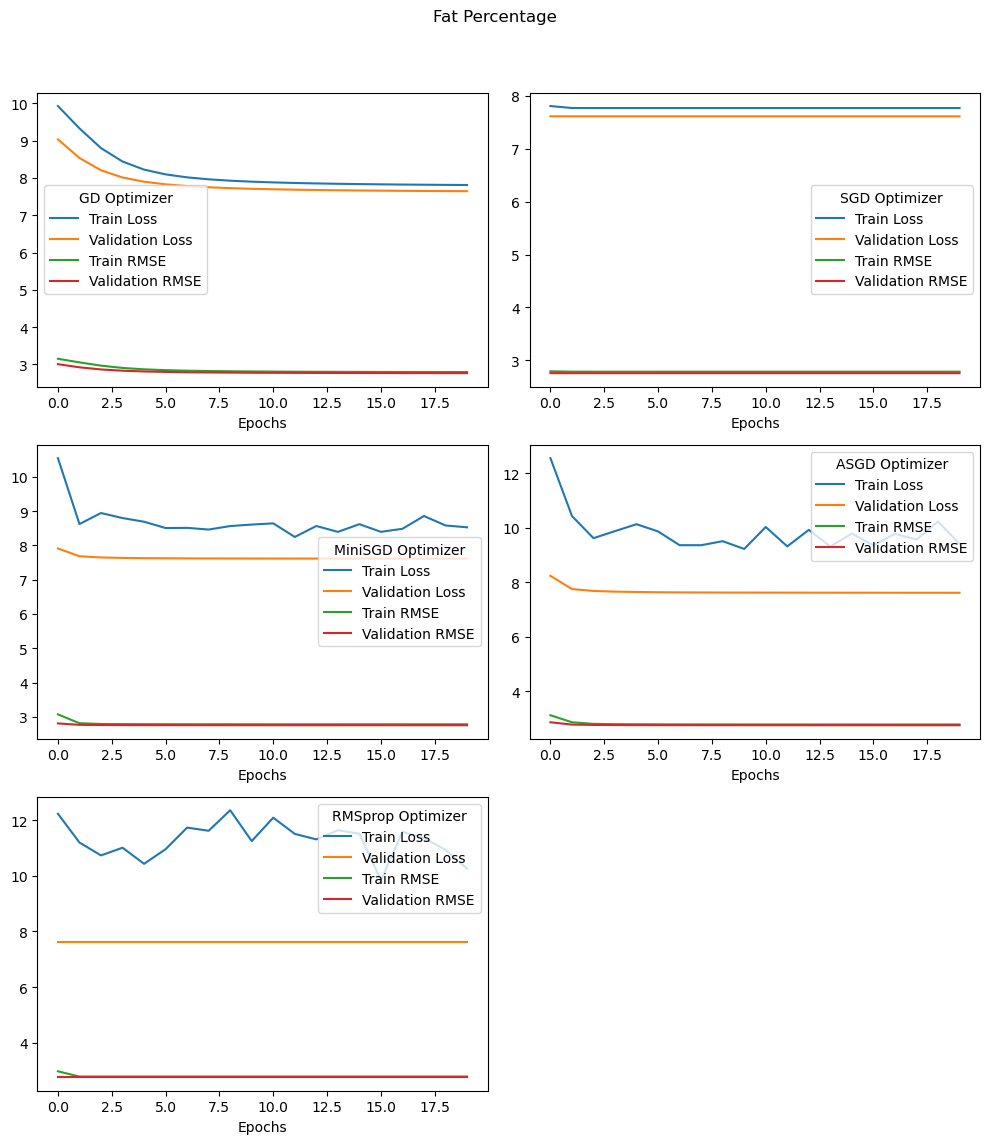

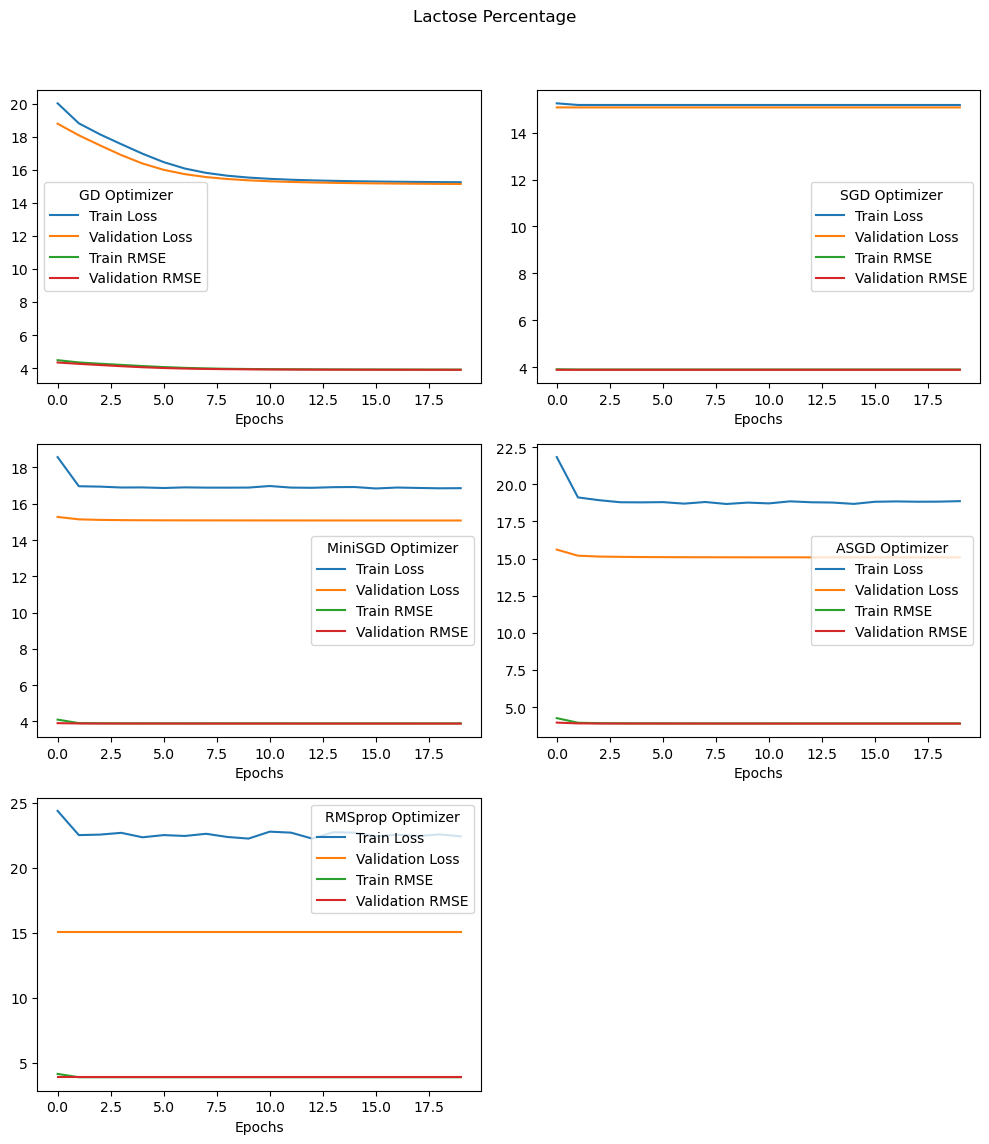

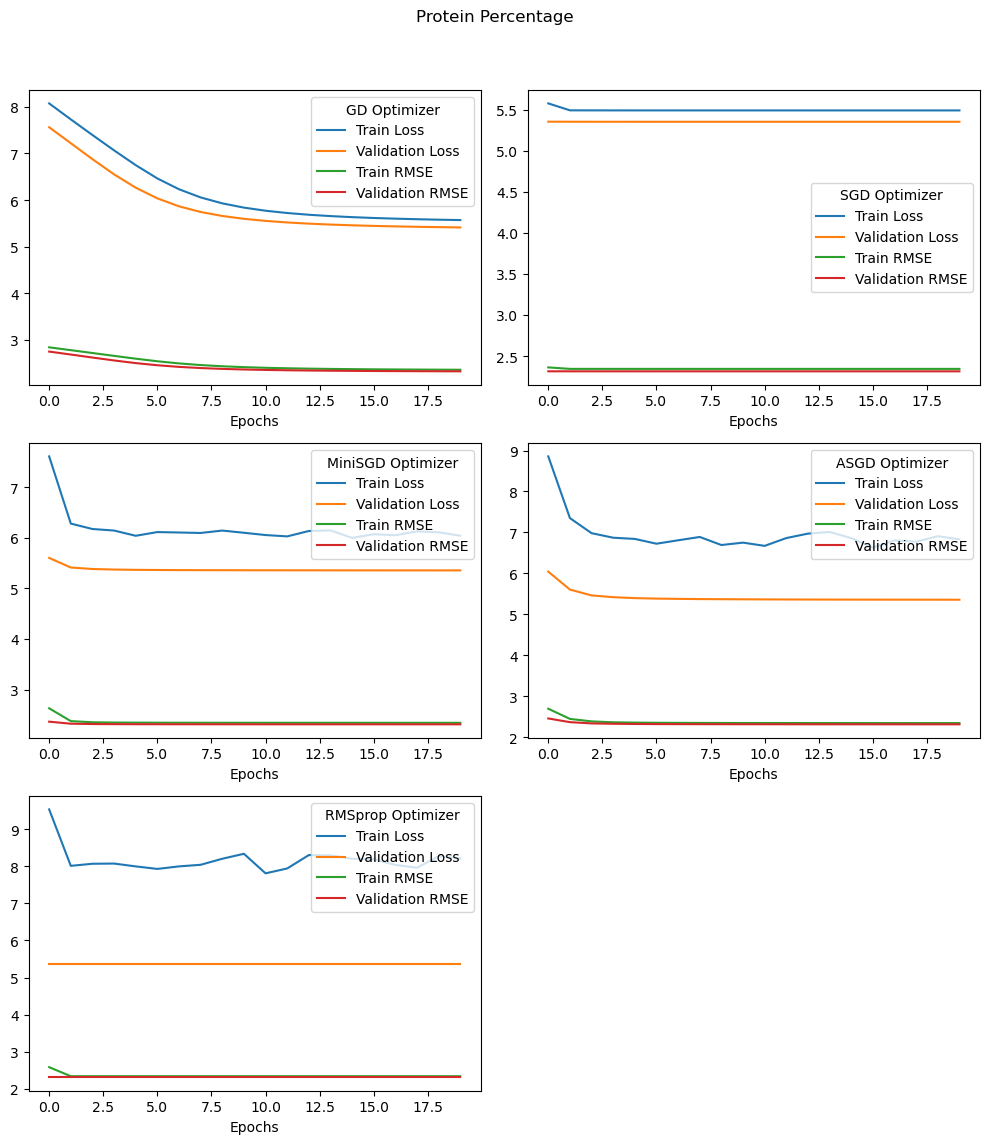

In [112]:
def plot_results(history, title):
    plt.figure(figsize=(10, 12))
    num_plots = len(history.keys())
    rows = 3
    cols = (num_plots + rows - 1) // rows
    
    for i, (nn_name, data) in enumerate(history.items(), 1):
        plt.subplot(rows, cols, i)
        plt.plot(data[0], label='Train Loss')
        plt.plot(data[1], label='Validation Loss')
        plt.plot(data[2], label='Train RMSE')
        plt.plot(data[3], label='Validation RMSE')
        plt.xlabel('Epochs')
        plt.legend(title=nn_name + ' Optimizer')
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
    plt.show()

# Plot results for each target variable
plot_results(history_fat, "Fat Percentage")
plot_results(history_lactose, "Lactose Percentage")
plot_results(history_protein, "Protein Percentage")

In [113]:
#pip install mlxtend

In [114]:
'''
def decision_tree(history_tf, title, nn_tf):
    plt.figure(figsize=(12, 2))
    for nn_i, nn_name in enumerate(nn_tf.keys()):
        plt.subplot(1, len(history_tf), nn_i+1)
        plot_decision_regions(X=X_val.cpu().numpy(), 
                      y=y_val.cpu().int().numpy(),
                      clf=nn_tf[nn_name])
        plt.xlabel(r'$x_1$', size=8)
        plt.ylabel(r'$x_2$', size=8)
        plt.title(nn_name+' Tensorflow NN\nDecision Regions', size=8)
    plt.show()


decision_tree(history_fat, "Fat Percentage", nn_torch)
decision_tree(history_lactose, "Lactose Percentage", nn_torch)
decision_tree(history_protein, "Protein Percentage", nn_torch)
'''

'\ndef decision_tree(history_tf, title, nn_tf):\n    plt.figure(figsize=(12, 2))\n    for nn_i, nn_name in enumerate(nn_tf.keys()):\n        plt.subplot(1, len(history_tf), nn_i+1)\n        plot_decision_regions(X=X_val.cpu().numpy(), \n                      y=y_val.cpu().int().numpy(),\n                      clf=nn_tf[nn_name])\n        plt.xlabel(r\'$x_1$\', size=8)\n        plt.ylabel(r\'$x_2$\', size=8)\n        plt.title(nn_name+\' Tensorflow NN\nDecision Regions\', size=8)\n    plt.show()\n\n\ndecision_tree(history_fat, "Fat Percentage", nn_torch)\ndecision_tree(history_lactose, "Lactose Percentage", nn_torch)\ndecision_tree(history_protein, "Protein Percentage", nn_torch)\n'

In [115]:
# Set the device
device = 'cpu'

# Simulate the target outputs
y_lactose_train = torch.tensor([0 if elem[0] * elem[1] < 0 else 1 for elem in X_train], device=device, dtype=torch.float32)
y_fat_train = torch.tensor([0 if elem[0] * elem[1] < 0 else 1 for elem in X_train], device=device, dtype=torch.float32)
y_protein_train = torch.tensor([0 if elem[0] * elem[1] < 0 else 1 for elem in X_train], device=device, dtype=torch.float32)

# Convert to numpy arrays
X_train_np = X_train.cpu().numpy()
y_lactose_train_np = y_lactose_train.cpu().numpy()
y_fat_train_np = y_fat_train.cpu().numpy()
y_protein_train_np = y_protein_train.cpu().numpy()

# Store RMSE values
rmse_values = {
    'lactose': [],
    'fat': [],
    'protein': []
}

# Define the fitness function
def fitness_function(genomes, config, inputs, expected_outputs, target_name):
    inputs_list = inputs.tolist() if isinstance(inputs, torch.Tensor) else inputs
    outputs_list = expected_outputs.tolist() if isinstance(expected_outputs, torch.Tensor) else expected_outputs

    all_predicted = []
    all_expected = []

    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = 0.0
        for xi, xo in zip(inputs_list, outputs_list):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo) ** 2  # Using squared error
            all_predicted.append(output[0])
            all_expected.append(xo)

    rmse = np.sqrt(mean_squared_error(all_expected, all_predicted))
    rmse_values[target_name].append(rmse)
    print(f"RMSE for current generation ({target_name}): {rmse}")

# Function to run NEAT for a given target
def run_neat_for_target(inputs, outputs, config, target_name):
    pop = neat.Population(config)
    pop.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)

    pop.run(lambda genomes, config: fitness_function(genomes, config, inputs, outputs, target_name), 60)

    winner = pop.best_genome
    return winner

# Load configuration file with UTF-8 encoding
config_path = "config-feedforward-xor"
temp_config_path = "temp_config_feedforward_xor"

# Read the configuration file with UTF-8 encoding, and handle errors
with open(config_path, 'r', encoding='utf-8', errors='replace') as f:
    content = f.read()

# Remove problematic characters
cleaned_content = ''.join(c for c in content if ord(c) < 128)

# Write cleaned content to a temporary file with UTF-8 encoding
with open(temp_config_path, 'w', encoding='utf-8') as f:
    f.write(cleaned_content)

# Load configuration using the temporary file
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation,
                            temp_config_path)

# Train NEAT models for each target
target = {
    'lactose': run_neat_for_target(X_train_np, y_lactose_train_np, config, 'lactose'),
    'fat': run_neat_for_target(X_train_np, y_fat_train_np, config, 'fat'),
    'protein': run_neat_for_target(X_train_np, y_protein_train_np, config, 'protein')
}


 ****** Running generation 0 ****** 

RMSE for current generation (lactose): 0.9586025865388216
Population's average fitness: -238.00000 stdev: 0.00000
Best fitness: -238.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 2.017, standard deviation 1.392
Population of 100 members in 3 species:
   ID   age  size   fitness   adj fit  stag
  ====  ===  ====  =========  =======  ====
     1    0    94   -238.000    0.000     0
     2    0     5         --       --     0
     3    0     1         --       --     0
Total extinctions: 0
Generation time: 0.585 sec

 ****** Running generation 1 ****** 

RMSE for current generation (lactose): 0.936933583994986
Population's average fitness: -227.36174 stdev: 40.27952
Best fitness: -20.61452 - size: (1, 1) - species 1 - id 127
Average adjusted fitness: 0.017
Mean genetic distance 2.794, standard deviation 1.474
Population of 100 members in 3 species:
   ID   age  size   fitness   adj fit  stag
  ====  ===

Best genome for lactose: Key: 5080
Fitness: -11.412257656503606
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.11492921143074747, response=1.0, activation=sigmoid, aggregation=sum)
	24 DefaultNodeGene(key=24, bias=-0.17583378613895728, response=1.0, activation=relu, aggregation=sum)
	438 DefaultNodeGene(key=438, bias=-0.033875917956081025, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=0.14220063376952657, enabled=True)
	DefaultConnectionGene(key=(-2, 24), weight=-3.088264185402698, enabled=True)
	DefaultConnectionGene(key=(-2, 438), weight=1.816071393182817, enabled=True)
	DefaultConnectionGene(key=(24, 0), weight=3.442031083138831, enabled=True)
	DefaultConnectionGene(key=(438, 0), weight=0.5133583142447165, enabled=True)
Best genome for fat: Key: 4027
Fitness: -18.43326545921602
Nodes:
	0 DefaultNodeGene(key=0, bias=-2.529837427664175, response=1.0, activation=sigmoid, aggregation=sum)
	707 DefaultNodeGene(key=707, bias=-0.612392909

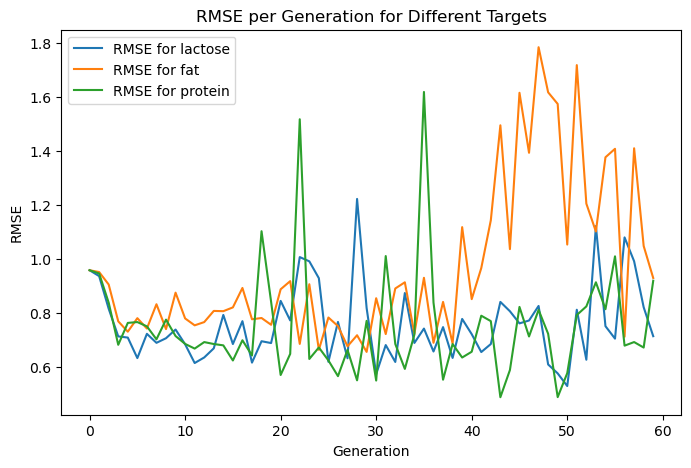

In [116]:
# Output the best genomes for each target
for target_name, winner in target.items():
    print(f"Best genome for {target_name}: {winner}")

# Plot RMSE values
plt.figure(figsize=(8, 5))
for target_name, values in rmse_values.items():
    plt.plot(values, label=f'RMSE for {target_name}')
plt.xlabel('Generation')
plt.ylabel('RMSE')
plt.title('RMSE per Generation for Different Targets')
plt.legend()
plt.show()